In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import math
import numpy as np
from IPython.display import Image
import scipy as sp
from scipy import stats

pio.renderers.default = 'vscode'
pio.templates.default = 'plotly'


In [2]:
aapl_df = pd.read_csv('AAPL.csv')
btc_df = pd.read_csv('BTC.csv')
gas_df = pd.read_csv('GAS.csv')
aapl_df['date'] = aapl_df['date'].apply(lambda x: pd.to_datetime(x))
btc_df['date'] = btc_df['date'].apply(lambda x: pd.to_datetime(x))
gas_df['Date'] = gas_df['Date'].apply(lambda x: pd.to_datetime(x))

In [3]:
aapl_df

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2019-09-23,53.383072,53.600066,53.066113,53.326996,53.326996,76662000,0.0,0.0
1,2019-09-24,53.890204,54.246174,52.953959,53.073425,53.073425,124763200,0.0,0.0
2,2019-09-25,53.285552,54.004802,52.941773,53.890209,53.890209,87613600,0.0,0.0
3,2019-09-26,53.639082,53.868268,53.353820,53.612263,53.612263,75334000,0.0,0.0
4,2019-09-27,53.770740,53.873145,52.975908,53.351383,53.351383,101408000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
863,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500,0.0,0.0
864,2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000,0.0,0.0
865,2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000,0.0,0.0
866,2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52279800,0.0,0.0


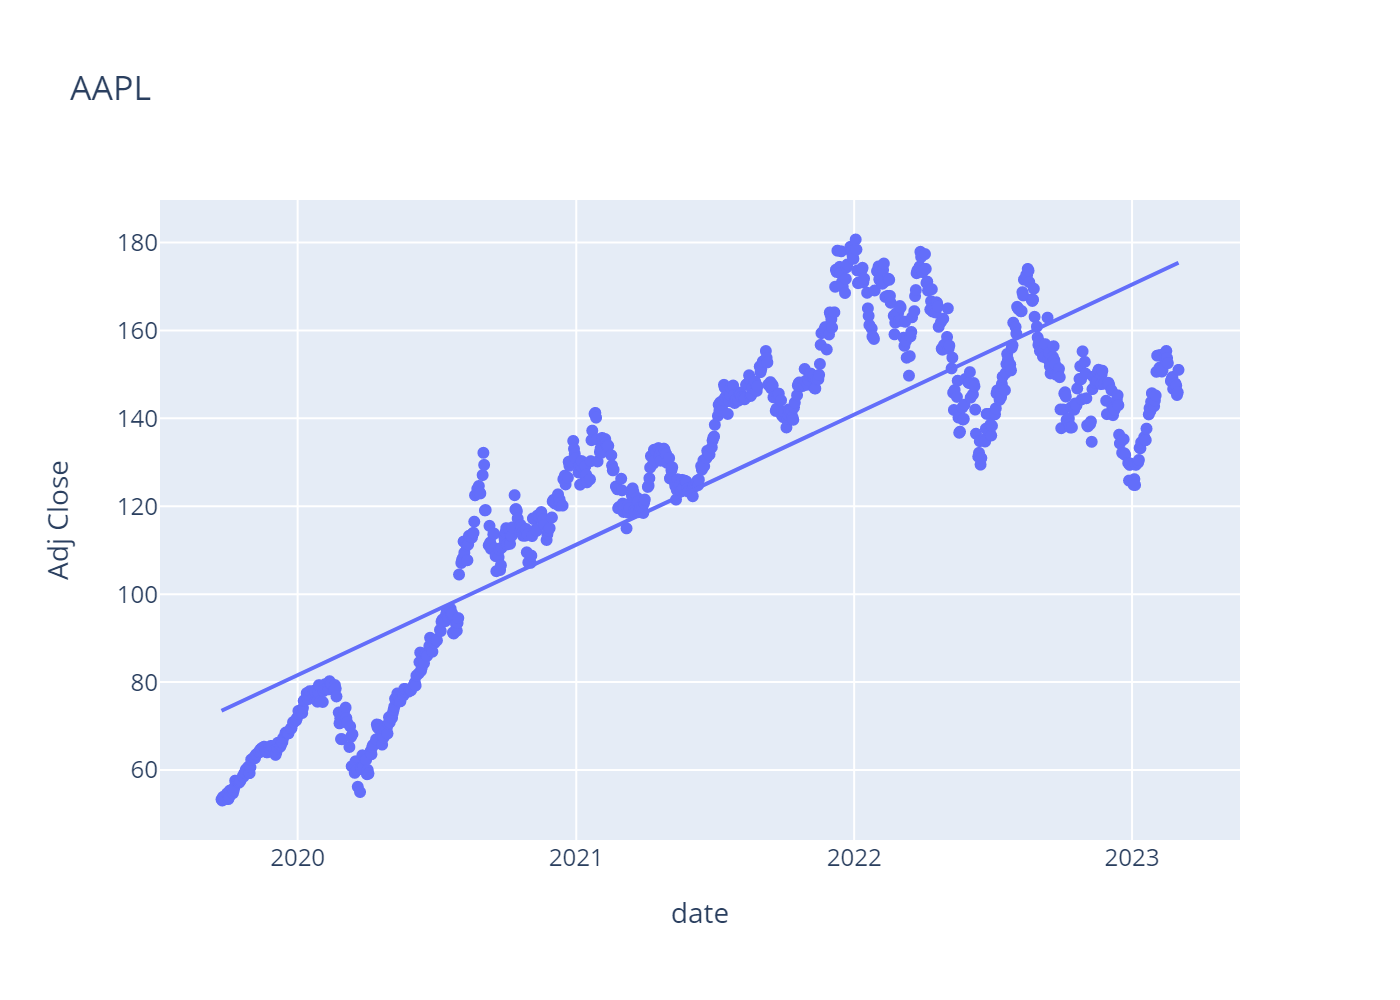

In [8]:
fig = px.scatter(data_frame=aapl_df, x='date', y='Adj Close', trendline='ols', title='AAPL')
# fig.show()
img_bytes = fig.to_image(format="png", scale=2)
Image(img_bytes)

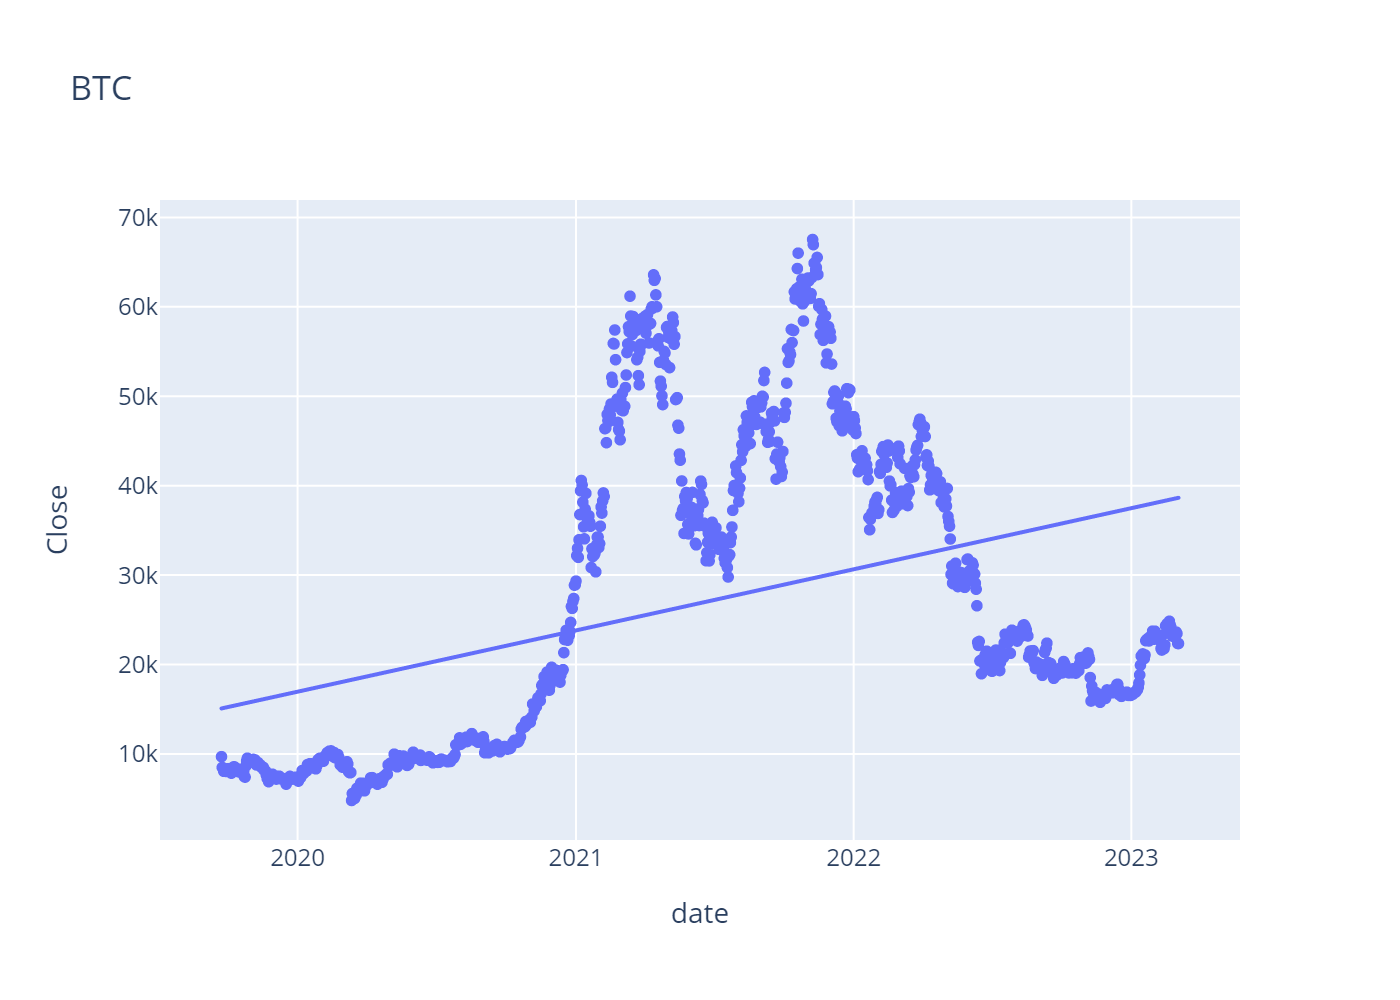

In [9]:
fig = px.scatter(data_frame=btc_df, x='date', y='Close', trendline='ols', title='BTC')
# fig.show()
img_bytes = fig.to_image(format="png", scale=2)
Image(img_bytes)

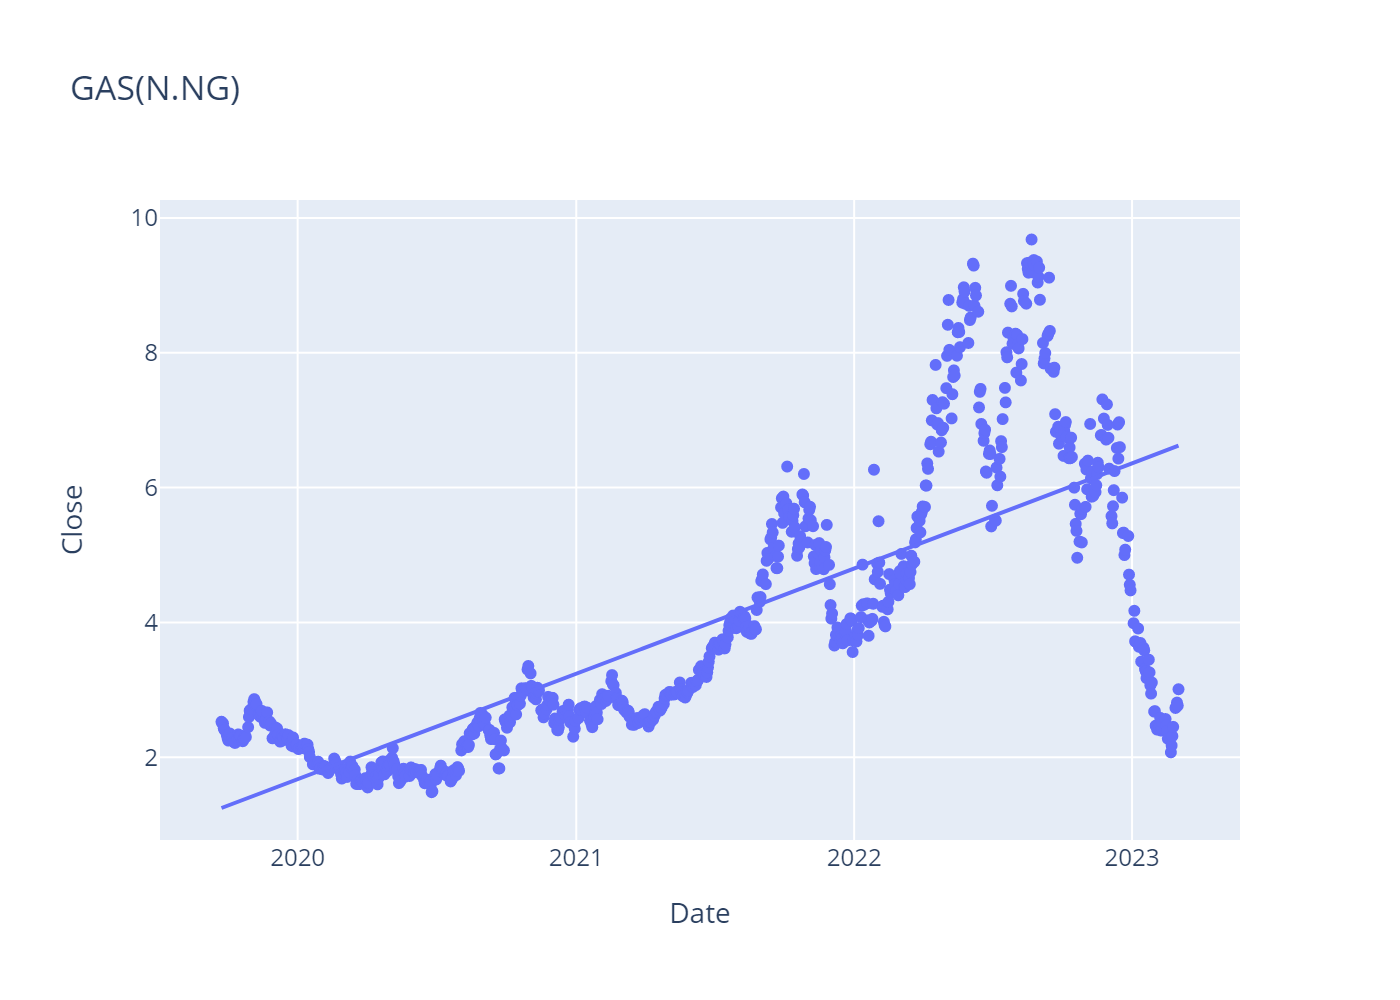

In [10]:
fig = px.scatter(data_frame=gas_df, x='Date', y='Close', trendline='ols', title='GAS(N.NG)')
# fig.show()
img_bytes = fig.to_image(format="png", scale=2)
Image(img_bytes)

In [ ]:
# на основе Close извлеките логарифмическую доходность BTC task1, ответ – мю и сигма
# проверьте распределение получившихся данных BTC task2, ответ yes/no 
# возмонжо попробуйте их (BTC) нормализовать task3, ответ – mu и sigma
# попробуйте предположить по подвыборке размером 634 дней среднее значение для доходностей (BTC) на уровне 90 95 99 – task 4, ответ – val + [a;b]
# проверьте корреляцию доходностей BTC & AAPL – task5, ответ – yes/no
# проверьте гипотезу о равенствен средних и дисперсии доходностей BTC & AAPL & GAS – task6, ответ – yes/no

In [111]:
btc_df = pd.read_csv('BTC.csv')

In [112]:
btc_df

,date,Open,High,Low,Close,Volume
0,2019-09-23,10028.05,10049.99,9615.77,9702.25,31937.232356
1,2019-09-24,9702.20,9794.99,7800.00,8493.14,94007.345203
2,2019-09-25,8497.55,8730.00,8215.64,8430.05,60783.892258
3,2019-09-26,8430.05,8465.99,7750.00,8063.73,67930.853749
4,2019-09-27,8063.49,8265.00,7852.15,8177.91,43882.924625
...,...,...,...,...,...,...
1254,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.998940
1255,2023-03-01,23141.57,24000.00,23020.03,23628.97,315287.417370
1256,2023-03-02,23629.76,23796.93,23195.90,23465.32,239315.452190
1257,2023-03-03,23465.32,23476.95,21971.13,22354.34,319954.197850


In [11]:
# 1

'''
Логарифмическая доходность:
Rlog = ln(Vf/Vi), где 
Vf - конечная стоимость, включая дивиденды и проценты (кол-во единиц * дивиденты + кол-во единиц * конечную цену)
Vi - начальное значение (кол-во единиц * стартовую цену)

Дата-фрейм BTC.csv: 
Open - цена открытия
Close - цена закрытия
High - максимальная цена
Low - минмиальная цена 
Volume - денежный объем или число сделок за определенный временной интервал или кол-во активов за определенный временной период

Положительная доходность - убыток
'''

res_table = [0]

def LR_old():
    for i in range(0, len(btc_df)):
        Vi = btc_df['Volume'][i] * btc_df['Open'][i]
        Vf = btc_df['Volume'][i] * (btc_df['Close'][i] + (btc_df['Open'][i]-btc_df['Close'][i]))
        Rlog = math.log(Vf/Vi)
        res_table.append(Rlog)

def LR_BTC():
    for i in range(len(btc_df)-1):
        Vi = btc_df['Close'][i]
        Vf = btc_df['Close'][i+1]
        Rlog = math.log(Vf/Vi)
        res_table.append(Rlog)
    btc_df['LR'] = res_table
    print(btc_df[['LR']])
    smpl_mean = btc_df['LR'].mean()
    print('\nsample mean BTC:', smpl_mean)
    std_dev = btc_df['LR'].std()
    print('\nstandard deviation BTC:', std_dev)


LR_BTC()

            LR
0     0.000000
1    -0.133099
2    -0.007456
3    -0.044426
4     0.014060
...        ...
1254 -0.015033
1255  0.020843
1256 -0.006950
1257 -0.048503
1258 -0.000229

[1259 rows x 1 columns]

sample mean BTC: 0.0006627749036916366

standard deviation BTC: 0.03867140190476366


 Проверка с помощью теста Колмогорова-Смирнова: 

KstestResult(statistic=0.45127778445880573, pvalue=1.385777505675991e-234, statistic_location=0.10039623993986292, statistic_sign=1)

 Проверка с помощью диаграммы: 


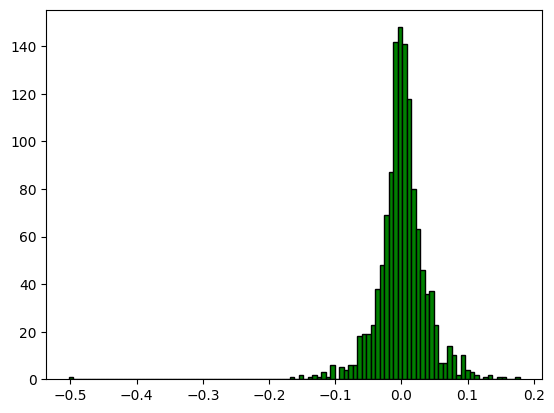

 Проверка с помощью qq графика: 


C:\Users\user\AppData\Local\Temp\ipykernel_3276\1104871896.py:22: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



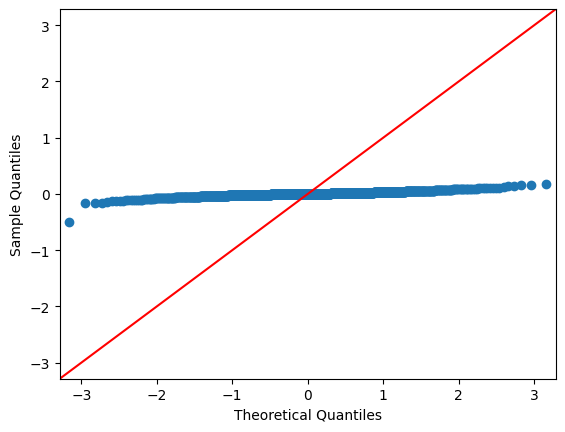

In [25]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import kstest

def ver():
    ###
    print(' Проверка с помощью теста Колмогорова-Смирнова: \n')
    print(kstest(btc_df['LR'], 'norm'))
    #### KstestResult(statistic=0.45127778445880573, pvalue=1.385777505675991e-234, statistic_location=0.10039623993986292, statistic_sign=1)
    #### Поскольку значение p сильно меньше 0.05 мы отвергаем нулевую гипотезу теста Колмогорова-Смирнова

    ###
    plt.hist(btc_df['LR'], color='green', edgecolor='black', bins=100)
    print('\n Проверка с помощью диаграммы: ')
    plt.savefig('btc_df_LR_dia.png', bbox_inches='tight')
    plt.show()

    ###
    fig = sm.qqplot (btc_df['LR'], line='45')
    print(' Проверка с помощью qq графика: ')
    fig.show()
    fig.savefig('btc_df_LR_qq.png')

ver()


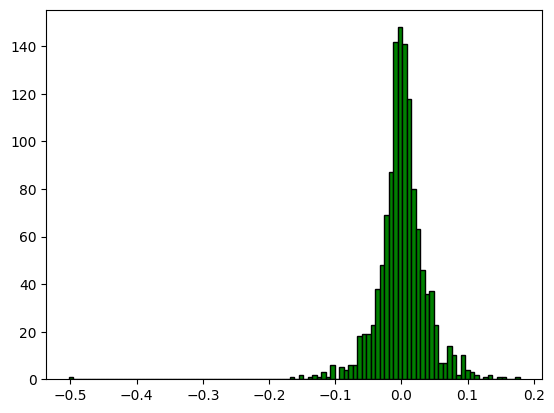
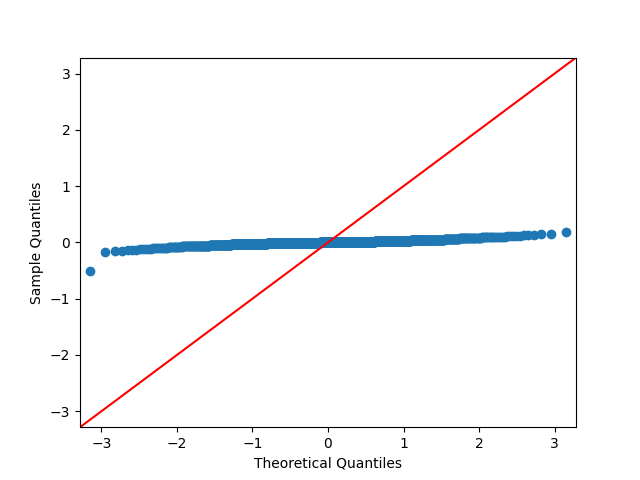

In [115]:
## По второму заданию - данные распрделны ненормально

In [116]:
# 3
# нормализация среднего
def avg_nrm():
    normalized_df=(btc_df['LR']-btc_df['LR'].mean())/btc_df['LR'].std()
    btc_df['NLR'] = normalized_df
    print(btc_df)
avg_nrm()

            date      Open      High       Low     Close         Volume  \
0     2019-09-23  10028.05  10049.99   9615.77   9702.25   31937.232356   
1     2019-09-24   9702.20   9794.99   7800.00   8493.14   94007.345203   
2     2019-09-25   8497.55   8730.00   8215.64   8430.05   60783.892258   
3     2019-09-26   8430.05   8465.99   7750.00   8063.73   67930.853749   
4     2019-09-27   8063.49   8265.00   7852.15   8177.91   43882.924625   
...          ...       ...       ...       ...       ...            ...   
1254  2023-02-28  23492.09  23600.00  23020.97  23141.57  264140.998940   
1255  2023-03-01  23141.57  24000.00  23020.03  23628.97  315287.417370   
1256  2023-03-02  23629.76  23796.93  23195.90  23465.32  239315.452190   
1257  2023-03-03  23465.32  23476.95  21971.13  22354.34  319954.197850   
1258  2023-03-04  22354.34  22410.00  22269.94  22349.22   56219.244110   

            LR       NLR  
0     0.000000 -0.017139  
1    -0.133099 -3.458934  
2    -0.007456 -0.

In [117]:
def ver_an():
    smpl_mean = 0
    smpl_mean = btc_df['NLR'].mean()
    print('\nsample mean BTC:', smpl_mean)

    std_dev = 0
    std_dev = btc_df['NLR'].std()
    print('\nstandard deviation BTC:', std_dev)

    print('\nПроверка с помощью теста Колмогорова-Смирнова: ')
    print(kstest(btc_df['NLR'], 'norm'))
ver_an()


sample mean BTC: 5.643707194281971e-18

standard deviation BTC: 1.0

Проверка с помощью теста Колмогорова-Смирнова: 
KstestResult(statistic=0.09163743833249019, pvalue=1.1907391130214816e-09, statistic_location=-0.4291880294116472, statistic_sign=-1)


In [118]:
# нормализация минимаксная
def mm_norm():
    normalized_df = []
    normalized_df=(btc_df['LR']-btc_df['LR'].min ())/(btc_df['LR'].max ()-btc_df['LR'].min ())
    btc_df['MNLR'] = normalized_df
    print(btc_df)
mm_norm()

            date      Open      High       Low     Close         Volume  \
0     2019-09-23  10028.05  10049.99   9615.77   9702.25   31937.232356   
1     2019-09-24   9702.20   9794.99   7800.00   8493.14   94007.345203   
2     2019-09-25   8497.55   8730.00   8215.64   8430.05   60783.892258   
3     2019-09-26   8430.05   8465.99   7750.00   8063.73   67930.853749   
4     2019-09-27   8063.49   8265.00   7852.15   8177.91   43882.924625   
...          ...       ...       ...       ...       ...            ...   
1254  2023-02-28  23492.09  23600.00  23020.97  23141.57  264140.998940   
1255  2023-03-01  23141.57  24000.00  23020.03  23628.97  315287.417370   
1256  2023-03-02  23629.76  23796.93  23195.90  23465.32  239315.452190   
1257  2023-03-03  23465.32  23476.95  21971.13  22354.34  319954.197850   
1258  2023-03-04  22354.34  22410.00  22269.94  22349.22   56219.244110   

            LR       NLR      MNLR  
0     0.000000 -0.017139  0.737982  
1    -0.133099 -3.458934 

In [119]:
def ver_mm():
    smpl_mean = 0
    smpl_mean = btc_df['MNLR'].min()
    print('\nsample mean (= min) BTC:', smpl_mean)

    std_dev = 0
    std_dev = btc_df['MNLR'].max()
    print('\nstandard deviation (= max) BTC:', std_dev)

    print('\nПроверка с помощью теста Колмогорова-Смирнова: ')
    print(kstest(btc_df['MNLR'], 'norm'))
ver_mm()


sample mean (= min) BTC: 0.0

standard deviation (= max) BTC: 1.0

Проверка с помощью теста Колмогорова-Смирнова: 
KstestResult(statistic=0.7115764859125048, pvalue=0.0, statistic_location=0.6003801618207923, statistic_sign=-1)


In [155]:
# 4
tmp_btc_df = pd.DataFrame(columns=['LR'], index=range(0, 634))
for i in range(634):
    tmp_btc_df['LR'][i] = (btc_df['LR'][i])
print(tmp_btc_df)
print(btc_df['LR'].head(634))

           LR
0         0.0
1   -0.133099
2   -0.007456
3   -0.044426
4     0.01406
..        ...
629  0.093258
630  0.037615
631  -0.00923
632 -0.045745
633 -0.006699

[634 rows x 1 columns]
0      0.000000
1     -0.133099
2     -0.007456
3     -0.044426
4      0.014060
         ...   
629    0.093258
630    0.037615
631   -0.009230
632   -0.045745
633   -0.006699
Name: LR, Length: 634, dtype: float64


In [166]:
# vyborka = btc_df.sample(634)
# vyborka.reset_index(drop= True, inplace= True)

def find_expectation(dataframe, size, base=1):
    exp = 0
    for i in range(size):
        exp += dataframe.loc[i, 'LR'] ** base
    return exp / 634

mu = find_expectation(tmp_btc_df, 634)
print('', mu)

sigma = 0
for i in range(634):
    sigma = (tmp_btc_df.loc[i, 'LR'] - mu) ** 2
sigma /= 634
sigma **= 0.5
print(sigma)

# доверительный уровень - 90%, следовательно, z = 1.7
a = mu - 1.7 * sigma / (634 ** 0.5)
b = mu + 1.7 * sigma / (634 ** 0.5)
print(f"({a}, {b})")
int90 = (a+b)/2

# доверительный уровень - 95%, следовательно, z = 1.96
a = mu - 1.96 * sigma / (634 ** 0.5)
b = mu + 1.96 * sigma / (634 ** 0.5)
print(f"({a}, {b})")
int95 = (a+b)/2

# доверительный уровень - 99%, следовательно, z = 2.6
a = mu - 2.6 * sigma / (634 ** 0.5)
b = mu + 2.6 * sigma / (634 ** 0.5)
print(f"({a}, {b})")
int99 = (a+b)/2

print(int90, int95, int99)

 0.002157211251258873
0.0003517235697628376
(0.002133464414613086, 0.0021809580879046603)
(0.0021298325454790243, 0.002184589957038722)
(0.0021208925599182572, 0.002193529942599489)
0.002157211251258873 0.002157211251258873 0.002157211251258873


In [183]:
def LR_AAPL():
    res_table = [0]
    for i in range(len(aapl_df)-1):
        Vi = aapl_df['Close'][i]
        Vf = aapl_df['Close'][i+1]
        Rlog = math.log(Vf/Vi)
        res_table.append(Rlog)
    aapl_df['LR'] = res_table


def LR_GAS():
    res_table = [0]
    for i in range(len(gas_df)-1):
        Vi = gas_df['Close'][i]
        Vf = gas_df['Close'][i+1]
        Rlog = math.log(Vf/Vi)
        res_table.append(Rlog)
    gas_df['LR'] = res_table


LR_AAPL()
#5
print('Корелляция: ', btc_df['LR'].corr(aapl_df['LR']))

LR_GAS()
#6
print(btc_df['LR'].mean(), aapl_df['LR'].mean(), gas_df['LR'].mean())
print(btc_df['LR'].var(), aapl_df['LR'].var(), gas_df['LR'].var())
# gas_df

0.021812048910141955
0.0006627749036916366 0.0011993499917170762 0.0002004305508431835
0.0014954773252797587 0.0004952378146671702 0.002257644293735615


In [184]:
ANSWERS = {
    'tasks' : {
        'task1_mu' : {
            "answer" : 0.0006627749036916366
        }, 
        'task1_sigma' : {
            "answer" : 0.03867140190476366
        }, 
        'task2_normal' : {
            'answer' : 'no'
        }, 
        'task3_mu' : {
            "answer" : 0
        }, 
        'task3_sigma' : {
            "answer" : 1
        }, 
        'task4_90' : {
            "answer" : 0.002157211251258873
        }, 
        'task4_90_int' : {
            "answer" : [0.002133464414613086, 0.0021809580879046603]
        }, 
        'task4_95' : {
            "answer" : 0.002157211251258873
        }, 
        'task4_95_int' : {
            "answer" : [0.0021298325454790243, 0.002184589957038722]
        }, 
        'task4_99' : {
            "answer" : 0.002157211251258873
        }, 
        'task4_99_int' : {
            "answer" : [0.0021208925599182572, 0.002193529942599489]
        }, 
        'task5_corr' : {
            "answer" : 'no'
        },
        'task6_corr_mu' : {
            "answer" : 'no'
        },
        'task6_corr_sigma' : {
            "answer" : 'no'
        }
    }
}


In [185]:
import yaml
yaml_result = yaml.dump(ANSWERS)

print(yaml_result)

with open(f"hw03.yaml", "w") as f:
    f.write(yaml_result)

tasks:
  task1_mu:
    answer: 0.0006627749036916366
  task1_sigma:
    answer: 0.03867140190476366
  task2_normal:
    answer: 'no'
  task3_mu:
    answer: 0
  task3_sigma:
    answer: 1
  task4_90:
    answer: 0.002157211251258873
  task4_90_int:
    answer:
    - 0.002133464414613086
    - 0.0021809580879046603
  task4_95:
    answer: 0.002157211251258873
  task4_95_int:
    answer:
    - 0.0021298325454790243
    - 0.002184589957038722
  task4_99:
    answer: 0.002157211251258873
  task4_99_int:
    answer:
    - 0.0021208925599182572
    - 0.002193529942599489
  task5_corr:
    answer: 'no'
  task6_corr_mu:
    answer: 'no'
  task6_corr_sigma:
    answer: 'no'

